In [1]:
import gym_unbalanced_disk
import gym
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
import time

def get_exp(Nsamps,q,f0,umax=3.0,seed=46):
    print('q=',q,'f0=',f0)
    np.random.seed(seed)
    from scipy import signal
    u0 = np.random.uniform(-1,1,size=Nsamps)
    if f0<1:
        u1 = signal.lfilter(*signal.butter(6,f0),u0)
    else:
        u1 = u0
    u1 /= max(np.max(u1),-np.min(u1))
    return umax*abs(u1)**(1/q)*np.sign(u1) if np.isfinite(q) else umax*np.sign(u1)

def apply_exp(ulist):
    obs = env.reset()
    ulist2 = []
    ylist = []
    for u in tqdm(ulist):
        ylist.append(obs)
        obs, reward, done, info = env.step(u)
        ulist2.append(u)
    env.reset()
    return np.array(ylist), np.array(ulist2)

In [5]:
umax = 3.0 
env = gym_unbalanced_disk.UnbalancedDisk_exp(umax = umax,dt = 0.025)
ulist = get_exp(100, q=1, f0=0.8,umax=umax) #q is pushing the inputs to the maximum
ylist,ulist = apply_exp(ulist)

connecting to experimental setup...done
q= 1 f0= 0.8


  0%|          | 0/100 [00:00<?, ?it/s]

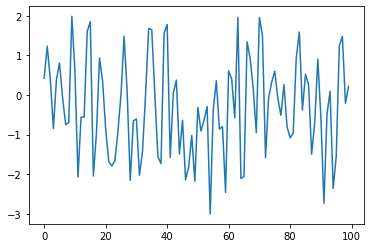

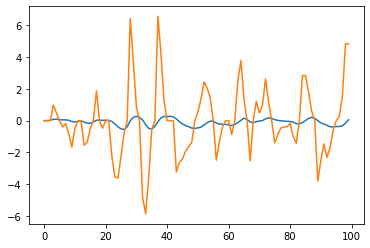

In [3]:
plt.plot(ulist) 
plt.show()
plt.plot(ylist)
plt.show()

In [9]:
env.close()